In [1]:
import pandas as pd
import numpy as np

import os
print(os.getcwd())

/Users/vega7unk/Documents/4th Sem DSI/ilab project/ilab-group-12-1-fall-detection/notebooks/DL_lpf_jitters


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns', None)

X, y = pd.read_pickle("/Users/vega7unk/Documents/4th Sem DSI/ilab project/ilab-group-12-1-fall-detection/data/processed/X_y_normalized_1.pkl")

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Converts labels to integers

# Optionally, store label mapping
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'BSC': 0, 'CHU': 1, 'CSI': 2, 'CSO': 3, 'FKL': 4, 'FOL': 5, 'JOG': 6, 'JUM': 7, 'LYI': 8, 'SCH': 9, 'SDL': 10, 'SIT': 11, 'STD': 12, 'STN': 13, 'STU': 14, 'WAL': 15}


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.15, random_state=42)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# Define your input shape: e.g., (window_length, channels)
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(set(y_train))  # 15 or 16 classes based on your labels

model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    # The LSTM layer now interprets the feature maps temporally.
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn_lstm.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

model_cnn_lstm.summary()


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 23, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 21, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 8, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,808 (507.06 KB)

 Trainable params: 129,808 (507.06 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model_cnn_lstm.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7324 - loss: 0.8735 - val_accuracy: 0.8756 - val_loss: 0.3292
Epoch 2/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8784 - loss: 0.3472 - val_accuracy: 0.9020 - val_loss: 0.2640
Epoch 3/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8991 - loss: 0.2781 - val_accuracy: 0.9053 - val_loss: 0.2373
Epoch 4/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9084 - loss: 0.2468 - val_accuracy: 0.9145 - val_loss: 0.2159
Epoch 5/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9155 - loss: 0.2193 - val_accuracy: 0.9185 - val_loss: 0.2015
Epoch 6/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9209 - loss: 0.1968 - val_accuracy: 0.9212 - val_loss: 0.1933
Epoch 7/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9250 - loss: 0.1871 - val_accuracy: 0.9251 - val_loss: 0.1854
Epoch 8/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9320 - loss: 0

1918/1918 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9633 - loss: 0.0891 - val_accuracy: 0.9416 - val_loss: 0.2403


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report, 
                             precision_score, recall_score, f1_score)

def evaluate_model(model, X_test, y_test, label_classes=None, plot_confusion_matrix=True, plot_roc=True):

    # Evaluate the model for loss and accuracy
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.4f}".format(loss))
    print("Test Accuracy: {:.4f}".format(accuracy))

    # Generate prediction probabilities and predicted classes
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    if plot_confusion_matrix:
        plt.figure(figsize=(10, 8))
        if label_classes is None:
            label_classes = [str(i) for i in range(cm.shape[0])]
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
                    xticklabels=label_classes, yticklabels=label_classes)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix")
        plt.show()

    # Compute and print classification report
    report = classification_report(y_test, y_pred, target_names=label_classes)
    print("Classification Report:\n", report)

    # Compute weighted precision, recall, and F1 scores
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Weighted Precision: {:.4f}".format(precision))
    print("Weighted Recall: {:.4f}".format(recall))
    print("Weighted F1 Score: {:.4f}".format(f1))

    metrics = {
        'loss': loss,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    return metrics

Test Loss: 0.2403
Test Accuracy: 0.9416
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


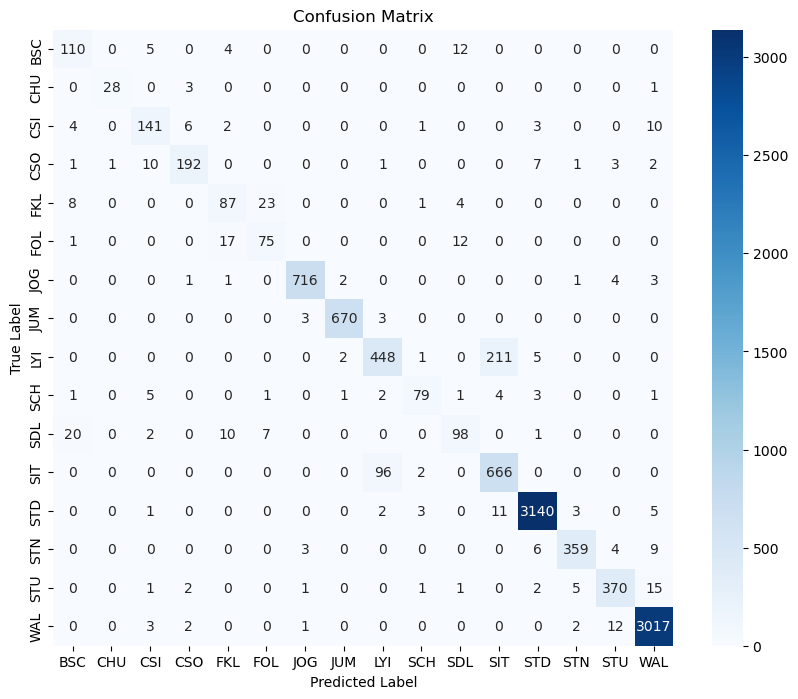

Classification Report:
               precision    recall  f1-score   support

         BSC       0.76      0.84      0.80       131
         CHU       0.97      0.88      0.92        32
         CSI       0.84      0.84      0.84       167
         CSO       0.93      0.88      0.91       218
         FKL       0.72      0.71      0.71       123
         FOL       0.71      0.71      0.71       105
         JOG       0.99      0.98      0.99       728
         JUM       0.99      0.99      0.99       676
         LYI       0.81      0.67      0.74       667
         SCH       0.90      0.81      0.85        98
         SDL       0.77      0.71      0.74       138
         SIT       0.75      0.87      0.80       764
         STD       0.99      0.99      0.99      3165
         STN       0.97      0.94      0.95       381
         STU       0.94      0.93      0.94       398
         WAL       0.98      0.99      0.99      3037

    accuracy                           0.94     10828
  

In [8]:
label_classes = [
    'BSC', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 
    'JOG', 'JUM', 'LYI', 'SCH', 'SDL', 'SIT', 
    'STD', 'STN', 'STU', 'WAL'
]

metrics = evaluate_model(model_cnn_lstm, X_test, y_test, label_classes=label_classes)
